# Workshop 1 : โหลดข้อมูลใบหน้าตัวอย่าง

In [2]:
from sklearn import datasets      # datasets
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces() # โหลดข้อมูลใบหน้าเเก็บในตัวแปร faces

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
faces.DESCR #ประวัติ
print(faces.DESCR) # รายละเอียดข้อมูล

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
faces.images.shape # ดูจำนวน Samples มีทั้งหมด 400 แถว Features 64 , 64

(400, 64, 64)

In [6]:
faces.images[0].round(2) # ดูค่าลำดับความสว่างโดยค่าความสว่างอยู่ระหว่าง 0-1 แต่ละ Pixel

array([[0.31, 0.37, 0.42, ..., 0.37, 0.33, 0.31],
       [0.34, 0.4 , 0.44, ..., 0.37, 0.34, 0.31],
       [0.34, 0.42, 0.45, ..., 0.38, 0.34, 0.3 ],
       ...,
       [0.21, 0.21, 0.22, ..., 0.15, 0.17, 0.17],
       [0.2 , 0.21, 0.21, ..., 0.15, 0.16, 0.17],
       [0.2 , 0.21, 0.2 , ..., 0.15, 0.16, 0.16]], dtype=float32)

# Workshop 2 : ดูภาพใบหน้าในข้อมูล

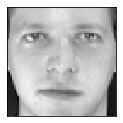

In [7]:
# แสดงภาพเดียว
img = faces.images[0] # อ่านข้อมูลใบหน้าลำดับ Row[0] (index=0)
plt.figure(figsize=(2,2)) # กำหนดขนาดให้แสดงภาพใบหน้า
plt.imshow(img, cmap=plt.cm.gray) # แสดงภาพในโหมด gray

# ไม่ต้องแสดงเส้นขีด (tick) รอบๆภาพ
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
plt.show()

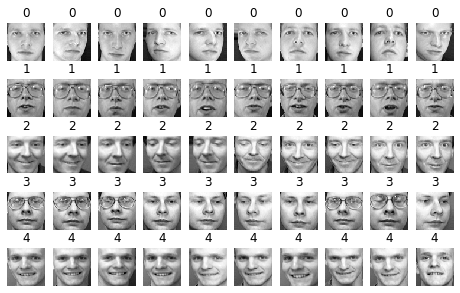

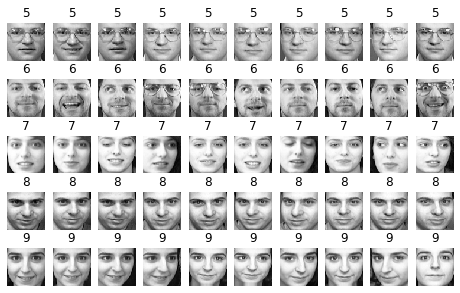

In [8]:
# แสดงใบหน้าพร้อมๆกันหลายภาพ
def visual_multi(i):  # สร้างฟังก์ชันรับตัวแปร i(เริ่มต้นที่รูปที่ i) ไว้แสดงภาพ row x column
    nplots = 50       # จำนวนภาพที่ต้องการแสดง
    fig = plt.figure(figsize=(8,5)) # กำหนดขนาดภาพ
    
    for j in range(nplots):
        plt.subplot(5, 10, j+1) # แบ่งการแสดงภาพเป็น 5 row x 10 column
        plt.imshow(faces.images[i+j], cmap=plt.cm.gray) # image show
        plt.title(faces.target[i+j]) # แสดง Target / label(class)
        plt.axis('off') # ไม่แสดงเส้นขีดของแกนกราฟ
    plt.show()

visual_multi(0) # แสดงตั้งแต่ลำดับแรก(index = 0)
visual_multi(50) # แสดงตั้งแต่ลำดับที่ 50 (index =50)

# Workshop 3 : เตรียมข้อมูลเพื่อ Train Test model

In [9]:
# แบ่งรูปแบบมา train 
n_samples = 60 # ต้องการ 60 ใบหน้า (10 คน คนละ 6 ภาพ)
#n_samples = 100 # ต้องการ 100 ใบหน้า (10 คน คนละ 10 ภาพ)
Xn = faces.images[:n_samples]
Xn.shape

(60, 64, 64)

In [10]:
# ข้อมูล Features ที่จะนำไปใช้ Train, Test
X = Xn.reshape(n_samples, -1) 
X.shape

(60, 4096)

In [11]:
# ข้อมูล Label Target ที่จะบุว่าคือใคร
y = faces.target[:n_samples]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [12]:
# แบ่งข้อมูล train test จาก sample ที่เลือกมา
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=.25, random_state=2)
print('X-Train:',X_train.shape,'y-Train:', y_train.shape)
print('X-Test:',X_test.shape,'y-Test:', y_test.shape)


X-Train: (45, 4096) y-Train: (45,)
X-Test: (15, 4096) y-Test: (15,)


# Workshop 4 : ทำการ Train และ Test

In [13]:
from sklearn import svm
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([3, 0, 4, 5, 2, 4, 0, 2, 5, 3, 0, 3, 4, 2, 0])

In [14]:
y_test

array([3, 0, 4, 5, 2, 4, 3, 2, 4, 3, 0, 3, 4, 2, 0])

จากการแบ่งด้วย train_test_split จะได้ y_test ซึ่งเป็นการสุ่ม (กำหนดค่าการสุ่มที่ random_state = 2 
สังเกตว่าใน y_test ไม่มีค่า 1 อยู่เลยนั่นหมายความว่า ใน 6 คน 1 ไม่ได้โดน train เหตุจากใบหน้ามีจำนวนน้อยเกินไปทำให้การสุ่มไม่ทั่วถึง
กำหนดชื่อให้แต่ละคนเพื่อความเข้าใจ 'Alex','Cala','Danna','Eva','Fox' Label 0 2 3 4 5 6

In [15]:
# การประเมิน Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test) # ทำนายผลอีกรอบ

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
class_names = ['Alex', 'Cala', 'Dana', 'Eva', 'Fox'] #ชื่อคนในภาพ
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.8667
              precision    recall  f1-score   support

        Alex       0.75      1.00      0.86         3
        Cala       1.00      1.00      1.00         3
        Dana       1.00      0.75      0.86         4
         Eva       1.00      0.75      0.86         4
         Fox       0.50      1.00      0.67         1

    accuracy                           0.87        15
   macro avg       0.85      0.90      0.85        15
weighted avg       0.92      0.87      0.87        15

[[3 0 0 0 0]
 [0 3 0 0 0]
 [1 0 3 0 0]
 [0 0 0 3 1]
 [0 0 0 0 1]]


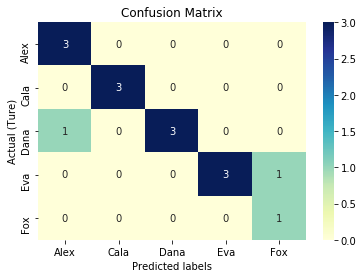

In [16]:
# Plot heat map from confusion matrix by seaborn
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()

plt.rcParams['figure.figsize'] = 5,4 #กำหนดขนาดของกราฟ
plt.rcParams.update({'font.size':10}) # ขนาดอักษรใน sns

sns.heatmap(cm, annot=True, ax=ax, cmap='YlGnBu') # โทนสี Y G B
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (Ture)')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [17]:
# จากตาราง พบว่าผลทำนายมีผิดพลาดบ้าง เข่น
# ใบหน้าจริง เป็น Dana(y=3) แต่ระบบทำนายเป็น Alex (y=0)

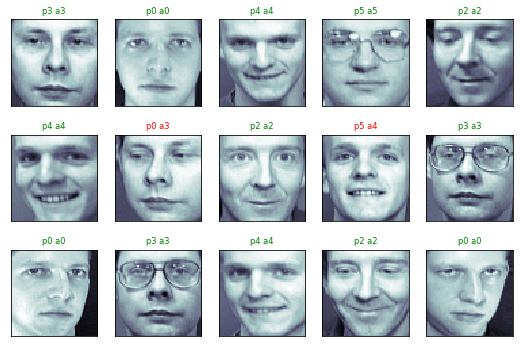

In [18]:
#ดูข้าใยหน้าที่ผิดพลาด
import numpy as np
fig = plt.figure(figsize=(9, 6)) 
y_pred = model.predict(X_test) 

# แสดงรูปภาพที่ทำนายผิดพลาดทั้งหมด
for i in range(len(X_test)):
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[]) # 3 row 5 column สั่งให้ plot รูปที่ i+1
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
             cmap=plt.cm.bone)
    colors = ('green' if y_pred[i] == y_test[i] else 'red') # ใช้สีแดงเมื่อทำนายผิด เขียวทำนายถูก
    title = 'p{} a{}'.format(y_pred[i], y_test[i])
    ax.set_title(title, fontsize='small', color=colors)

In [19]:
#ตรวจสอบ Open CV
import cv2
cv2.__version__

'4.1.2'

# Workshop 5: OpenCV แสดงภาพ

In [20]:
import cv2
# กำหนดการอ่านรูปเก็บในตัวแปร img
img = cv2.imread('test.jpg')
# เช็คขนาดรูป
print(img.shape)

(1080, 1440, 3)


In [21]:
# คำสั้งแสดงรูปภาพ เรียกใช้ให้ครบ
cv2.imshow('Show',img) #แสดวรูปภาพมี title 'Show'
cv2.waitKey(0) # กดปุ่มในแป้นพิมพ์เพื่อปิดหน้าต่าง
cv2.destroyAllWindows() #ปิดคืนค่าเครื่อง

In [22]:
# image processing 
img = cv2.imread('test.jpg',0) # โหมด 0 เปลี่ยนเป็นโทนเทา


In [23]:
# คำสั้งแสดงรูปภาพ เรียกใช้ให้ครบ
cv2.imshow('Show',img) #แสดวรูปภาพมี title 'Show'
cv2.waitKey(0) # กดปุ่มในแป้นพิมพ์เพื่อปิดหน้าต่าง
cv2.destroyAllWindows() #ปิดคืนค่าเครื่อง

In [24]:
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE : GRAYSCALE
# คำสั้งแสดงรูปภาพ เรียกใช้ให้ครบ
cv2.imshow('Show',img) #แสดวรูปภาพมี title 'Show'
cv2.waitKey(0) # กดปุ่มในแป้นพิมพ์เพื่อปิดหน้าต่าง
cv2.destroyAllWindows() #ปิดคืนค่าเครื่อง

# Workshop 6 : OpenCV อ่านค่าสีแต่ละชั้น

In [25]:
img = cv2.imread('test.jpg') # ดึงรูปใหม่มาเพราะมีสีครบ
blue = img[:, :, 0] # blue
green = img[:, :, 1] # green
red = img[:, :, 2] # red
cv2.imshow('Show',img) #แสดวรูปภาพมี title 'Show'
cv2.waitKey(0) # กดปุ่มในแป้นพิมพ์เพื่อปิดหน้าต่าง
cv2.destroyAllWindows() #ปิดคืนค่าเครื่อง

In [26]:
#ถ้าไม่มีสีนั้นๆจะเติมเป็นขาวดำ 
cv2.imshow('Show',green) #แสดวรูปภาพมี title 'Show'
cv2.waitKey(0) # กดปุ่มในแป้นพิมพ์เพื่อปิดหน้าต่าง
cv2.destroyAllWindows() #ปิดคืนค่าเครื่อง


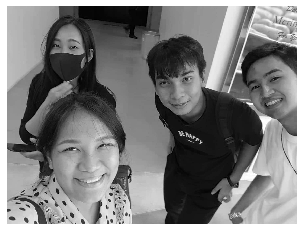

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(blue, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

# Workshop 7 : เล่น VDO

In [28]:
import cv2

# ค่าสเกลสำหรับย่อหรือลดขนาดจอแสดง VDO (1 คือ 100% ตามขนาดไฟล์ต้นฉบับ)
scale = 0.75 # ลดขนาดเหลือ 75%
cap = cv2.VideoCapture('TestVedio.mp4') # สร้าง obj เปิดไฟล์ VDO

# ตรวจสอบปัญหาถ้าเปิดไม่ได้ให้แจ้งเตือน
if (cap.isOpened() == False):
    print("Could not open the VDO file")
    
frame_counter = 0 # ตัวนับเฟรม(เริ่มต้น ให้ตัวนับ=0)
while(cap.isOpened()): # ทำการอ่านวนรอบภาพนิ่งจากวิดีโอ
    ret, frame = cap.read() #Capture frame-by-frame
    
    if ret == True:
        frame_counter += 1 # เพิ่มตัวนับ ในการอ่านเฟรมต่อไป
        # นับจำนวนเฟรมที่มีใน VDO : cv2.CAP_PROP_FRAME_COUNT
        if frame_counter >= cap.get(cv2.CAP_PROP_FRAME_COUNT):
            frame_counter = 0 #ถ้าจบ VDO แล้ววนรอบเริ่มเฟรมแรกใหม่
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_counter)
            
        # scale down ให้ หน้าต่าง วิดีโอลดลง
        frame = cv2.resize(frame, None, fx=scale, fy=scale,
                          interpolation=cv2.INTER_AREA)
        cv2.imshow('Mywindow', frame) # หน้าต่างแสดงเฟรมภาพ
    
    # หน่วงเวลาแต่ละเฟรม หรือ กดแป้น Esc เพื่อยุติการทำงาน ออกจากโปรแกรม(escape)
        if cv2.waitKey(30) & 0xFF ==27: #waitkey(30) หน่วงเวลาในการเล่นเฟรมใหม่แต่ละเฟรม
            break
    # ถ้สอ่านเฟรมไม่ได้ให้หยุดloob และปิดหน้าต่าง
    else: #else ของการอ่านเฟรม บรรทัด if ret == True
        break
cap.release() # คืนทรัพยากร video capture object
cv2.destroyAllWindows() # ปิดหน้าต่าง

Could not open the VDO file


# Workshop 8 : OpenCV แสดงภาพสดจากกล้อง

In [29]:
# เปิดกล้องใช้งานได้หรือไม่
import cv2
source = 0 # id ของกล้องส่วนใหญ่คือ 0 หรือ 1

cap = cv2.VideoCapture(source)   # เชื่อมต่อกล้อง(เปิดใช้งานกล้อง)
if cap is None or not cap.isOpened(): # ถ้าเชื่อมต่อหรือเปิดใช้งานกล้องไม่ได้
    print("Could not open the VDO file", source)
else:
    print('vdo source OK->', source)
    cap.release() # ปิดการใช้งานกล้อง

vdo source OK-> 0


In [30]:
# แสดงกล้องสด
import cv2

cap = cv2.VideoCapture(0)

#cap.set(3, 640) # กำหนดความกว้าง 
#cap.set(4, 480) # ความสูง
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 10)

#ถ้าเชื่อมต่อหรือเปิดใช้งานกล้องไม่ได้ ให้แจ้งเตือน
if cap.isOpened()== False: # ถ้าเชื่อมต่อหรือเปิดใช้งานกล้องไม่ได้
    print("Could not open the VDO file")

# วนรอบอ่านสัญญาณภาพแล้วแสดงที่ Mywindow
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        
        cv2.imshow('Mywindow', frame)
        if cv2.waitKey(3) & 0xFF == 27:
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()


# Workshop 9 : ตรวจจับใบหน้าในภาพนิ่ง

In [31]:
import cv2

scale = 0.5
image_file = 'test_img_detect11.jpg'

# ไฟล์ข้อมูลตรวจจับใบหน้าที่ Train เรียบร้อยแล้ว (Haar or LBP)
casc_file = 'haarcascade_frontalface_default.xml'

# สร้าง Haar cascade
frontal_face = cv2.CascadeClassifier(casc_file)

image = cv2.imread(image_file) # อ่านไฟล์ภาพ

# ลดขนาดภาพ
image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # แปลงเป็นโทนเทา

# ตรวจจับใบหน้าในภาพ
bBoxes = frontal_face.detectMultiScale(
    gray_img, scaleFactor=1.3, minNeighbors=5,
    minSize=(30, 30))
print("Found {} faces".format(len(bBoxes))) # แสดงจำนวนว่าพบใบหน้ากี่คน

# เขียนสี่เหลี่ยมล้อมบริเวณที่พบใบหน้า
for (x, y, w, h) in bBoxes:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) # กรอบสี่เหลี่ยมผืนผ้า RGB

cv2.imshow('MyWindow', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Found 2 faces


# Workshop 10 : ตรวจจับใบหน้าจากกล้องสด หรือ VDO

In [32]:
import cv2
# เปิดกล้อง หรือ ไฟล VDO (สร้าง Obj เพื่ออ่านอินพุต)
#cap = cv2.VideoCapture(0) # กรณีใช้กล้อง
cap = cv2.VideoCapture('TestVideo.mp4')

# โมเดลตรวจจับใบหน้าท่ี่ เทรนมาแล้ว ( Haar หรือ LBP)
casc_file = 'haarcascade_frontalface_default.xml'

# สร้าง Haar cascade
frontal_face = cv2.CascadeClassifier(casc_file)

# ตรวจสอบว่าเชื่อมต่อกับอินพุตภาพ (กล้อง หรือ วิดีโอ) เปิดได้หรือไม่
if (cap.isOpened()== False):
    print("Could not open the Camera file") # ถ้ามีปัญหา แจ้งเตือน

# ถ้าอินพุตไม่มีปัญหาทำการวนรอบ อ่านภาพและ ประมวลผล
while(cap.isOpened()):
    ret, frame = cap.read() # frame คือข้อมูล input
    
    if ret == True: # ถ้าอ่านข้อมูลภาพได้
        # เปลี่ยนเป็นภาพโทนเทา
        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        #ตรวจจับใบหน้าในเฟรม
        bBoxes = frontal_face.detectMultiScale(gray_img,
                                              scaleFactor=1.3, minNeighbors=5, minSize=(30,30))
        
        # จะได้ข้อมูลแบบ List ใน bBoxes กรณีมีหลายใบหน้า ก็ให้วนรอบตีกรอบทุกใบหน้า
        for(x, y, w, h) in bBoxes:
                                    # ตีกรอบสี RGB และขนาดเส้น Line Width
                cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
        cv2.imshow('MyWin', frame) # แสดงภาพและส่วนที่ตีกรอบใบหน้า
        
        # หน่วงเวลาเฟรมถัดไป หรือ ถ้าผู้ใช้ กดEsc ให้หยุด
        if cv2.waitKey(100) & 0xFF == 27:
            break
    else: #else ของ if ret=True
            break
cap.release()
cv2.destroyAllWindows()
        

# Workshop 11 : ระบบรู้จำและแยกแยะใบหน้า

In [33]:
# รัน crop_face เก็บในโฟลเดรฺ img_features
import cv2
cv2.__version__
# ws11
# ws11
import cv2
from os import listdir
import time

img_pixel = 96 


input_path= "img_people/"
output_path= "img_features/"

# see workshop 9
casc_file = "haarcascade_frontalface_default.xml"
# casc_file = "lbpcascade_frontalface.xml"

def cropImage(img, box, fname):
    [p, q, r, s] = box
    write_img_color= img[q:q+ s, p:p+ r]
    saveCropped(write_img_color, fname)

def saveCropped(img, fname):
    img = cv2.resize(img,(img_pixel,img_pixel),interpolation=cv2.INTER_AREA)
    cv2.imwrite(output_path + fname, img)

if __name__== "__main__":
    frontal_face= cv2.CascadeClassifier(casc_file)
    input_files= listdir("PythonImg_detection/"+ input_path)

    print("Starting to detect faces and save the cropped images...")
    sttime = time.time() 
    for i, fname in enumerate(input_files):
        print(input_path + fname)
        color_img= cv2.imread(input_path + fname)

        gray_img= cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)


        bBoxes= frontal_face.detectMultiScale(gray_img, scaleFactor=1.3, 
                                              minNeighbors=5, 
                                              minSize=(30, 30),
#                                               flags = cv.CV_HAAR_SCALE_IMAGE
                                             )

        for box in bBoxes:
            cropImage(gray_img, box, fname)

    print("Finished {} imgs in {:.2f} Secs." .format(i+1 , (time.time() - sttime)))  

Starting to detect faces and save the cropped images...
img_people/GC_01.PNG
img_people/GC_02.PNG
img_people/GC_03.PNG
img_people/GC_04.PNG
img_people/GC_05.PNG
img_people/GC_06.PNG
img_people/GC_07.PNG
img_people/GC_08.PNG
img_people/GC_09.PNG
img_people/GC_10.PNG
img_people/Ice_01.PNG
img_people/Ice_02.PNG
img_people/Ice_03.PNG
img_people/Ice_04.PNG
img_people/Ice_05.PNG
img_people/Ice_06.PNG
img_people/Ice_07.PNG
img_people/Ice_08.PNG
img_people/Ice_09.PNG
img_people/Ice_10.PNG
img_people/tide_01.png
img_people/tide_02.png
img_people/tide_03.png
img_people/tide_04.png
img_people/tide_05.png
img_people/tide_06.png
img_people/tide_07.png
img_people/tide_08.png
img_people/tide_09.png
img_people/tide_10.png
Finished 30 imgs in 0.41 Secs.


In [34]:

train_path = 'img_features_label/'
input_path = ''
label_file = 'labels.csv' 

casc_file = "haarcascade_frontalface_default.xml"
# casc_file = 'lbpcascade_frontalface.xml'

import cv2  
import numpy as np
import os, sys, time
import pandas as pd

img_pixel = (96, 96) 

def save_labels(people):
    df = pd.DataFrame(people, columns=['name'])
    df.to_csv(label_file)
    print('Saved labels..')
    print(people)

def get_images(path, size):
    class_id = 0  # target or class of the face
    images, labels= [], []
    people= []

    for subdir in os.listdir(path):
        for image in os.listdir(path + subdir):

            img= cv2.imread(path+os.path.sep+subdir+os.path.sep+image, cv2.IMREAD_GRAYSCALE)
            img= cv2.resize(img, size)

            images.append(np.asarray(img, dtype= np.uint8))
            labels.append(class_id)


        people.append(subdir)
        class_id += 1

    return [images, labels, people]


def train_model(path):
    [images, labels, people] = get_images(train_path, img_pixel) # ksb


    labels = np.asarray(labels, dtype= np.int32)
    print('Total trained images: {}'.format(len(labels)))
    print('Total classes : {}'.format(len(people)))

    # initializing eigen_model and training
    print("\nInitializing FaceRecognizer and training...")
    sttime= time.time()
#     eigen_model= cv2.face.EigenFaceRecognizer_create()
    face_model= cv2.face.LBPHFaceRecognizer_create()
    face_model.train(images, labels)

    print("\nCompleted training in {:.2f} s.\n" .format(time.time()- sttime))

    return [face_model, people]    

if __name__== "__main__":
    face_model, people = train_model(train_path) 
#     face_model.write('facemodel.xml')    
    face_model.write('facemodel.yml') 
    print('saved model..')
    save_labels(people)



Total trained images: 9
Total classes : 3

Initializing FaceRecognizer and training...

Completed training in 0.01 s.

saved model..
Saved labels..
['GC', 'ICE', 'Tide']


In [35]:
import pandas as pd
pd.DataFrame(people)

,0
0,GC
1,ICE
2,Tide


In [36]:
import cv2   
import pandas as pd

In [37]:
# face_model = cv2.face.EigenFaceRecognizer_create()
face_model = cv2.face.LBPHFaceRecognizer_create()
# face_model.read('facemodel.xml')
face_model.read('facemodel.yml')

In [38]:
# Predict Image

In [39]:
image_file = 'test_img_detect10.jpg'

feature_size = (96, 96) 

label_file = './labels.csv'
df = pd.read_csv(label_file)
y_label = df.name


def detect_faces(image):
#     casc_file = "lbpcascade_frontalface.xml"
    casc_file = "haarcascade_frontalface_default.xml"
    frontal_face= cv2.CascadeClassifier(casc_file)
    bBoxes= frontal_face.detectMultiScale(image, scaleFactor=1.2, 
        minNeighbors=5, minSize=(30, 30)  
                        )
    return bBoxes

color_image = cv2.imread(image_file)
dimensions = color_image.shape
print(dimensions)
img_resize_factor = 800 / dimensions[1] 

color_image = cv2.resize(color_image, None,fx=img_resize_factor,
               fy=img_resize_factor,interpolation=cv2.INTER_AREA)
    
gray_frame = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

bBoxes = detect_faces(gray_frame)

for bBox in bBoxes:
    (p,q,r,s)= bBox
    cv2.rectangle(color_image, (p,q), (p+r,q+s), (25,255,25), 2)


    crop_image = gray_frame[q:q+s, p:p+r]

    crop_image = cv2.resize(crop_image, feature_size) # ksb



    [pred_label, pred_conf] = face_model.predict(crop_image)
    print("Predicted person: {:8}".format(y_label[pred_label]))


    box_bg = (0, 255, 0)
    box_bg = (0, 180, 0)
    cv2.rectangle(color_image, (p,q), (p+95,q-22), box_bg, cv2.FILLED)
    

    box_text= y_label[pred_label][:7]
    txt_color = (255,255,255)
    cv2.putText(color_image, box_text, (p+4, q-4), 
                cv2.FONT_HERSHEY_PLAIN, 1.3, txt_color, 2)


cv2.imwrite('pred_imgb.jpg', color_image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imshow("Win", color_image )
cv2.waitKey(0)
cv2.destroyAllWindows() 

(1280, 960, 3)
Predicted person: Tide    
Predicted person: Tide    
Predicted person: Tide    


In [40]:
## VDO and Cam
scale = 0.5  
feature_size = (96, 96) 


label_file = './labels.csv'
df = pd.read_csv(label_file)
y_label = df.name

cascPath = "haarcascade_frontalface_default.xml"
# casc_file = 'lbpcascade_frontalface.xml'
frontal_face = cv2.CascadeClassifier(casc_file)  # Create the haar cascade

faces = []

cap = cv2.VideoCapture(0) # cam
cap.set(3, 640) 
cap.set(4, 420) 


if (cap.isOpened()== False):  
    print("Could not open the VDO file") 


def detect_faces(image):
    bBoxes = frontal_face.detectMultiScale(image, scaleFactor=1.3, 
        minNeighbors=5, minSize=(30, 30)) 
    return bBoxes    
    
frame_counter = 0
while(cap.isOpened()): 
    ret, frame = cap.read() 

    if ret == True: 
        color_image = frame
        frame_counter += 1

        if frame_counter >= cap.get(cv2.CAP_PROP_FRAME_COUNT):
            frame_counter = 0 
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            
        color_image = cv2.resize(color_image, None,fx=scale,fy=scale,
                                 interpolation=cv2.INTER_AREA)

        if (frame_counter % 5) == 0:

            gray_frame = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)


            bBoxes = detect_faces(gray_frame)
            for bBox in bBoxes:
                (p,q,r,s)= bBox
                
                cv2.rectangle(color_image, (p,q), (p+r,q+s), (25,255,25), 2)


                crop_image = gray_frame[q:q+s, p:p+r]

                crop_image = cv2.resize(crop_image, feature_size) # ksb
                [pred_label, pred_conf]= face_model.predict(crop_image)

                box_bg = (0, 255, 0)
                cv2.rectangle(color_image, (p,q), (p+95,q-22), box_bg, cv2.FILLED)

                box_text= y_label[pred_label][:7]
                txt_color = (100,0,215)
                cv2.putText(color_image, box_text, (p+4, q-4), 
                            cv2.FONT_HERSHEY_PLAIN, 1.3, txt_color, 2)

            cv2.imshow('Mywindow', color_image) 

        if cv2.waitKey(10) & 0xFF == 27: 
            break
   
    else:  # if ret true
        break
   

cap.release() 
cv2.destroyAllWindows()